Libraries to Import

In [47]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from keras.layers import Dropout
import matplotlib.pyplot as plt


Data Augmentation and Model Building

In [48]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                        rescale = 1.0/255.,
                        validation_split=0.2,
                        zoom_range=0.01,
                        featurewise_center=True,
                        samplewise_center=True, 
                        shear_range=0.015,
                        fill_mode='nearest',
                        rotation_range=10,
                        channel_shift_range=10.,
                        width_shift_range=0.01, 
                        height_shift_range=0.01,
                        horizontal_flip=True, 
                        vertical_flip=True)




test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.,
                                                               )
train_generator = train_datagen.flow_from_directory("F:/RPSdataset/RPS/AllinOne",
                                                    batch_size = 10,
                                                    class_mode = 'categorical',
                                                    color_mode= 'rgb',
                                                    shuffle = True,
                                                    subset ='training',
                                                    seed=32,
                                                    interpolation ="lanczos",
                                                    target_size = (60, 60) )

test_generator = train_datagen.flow_from_directory("F:/RPSdataset/RPS/AllinOne",
                                                    batch_size = 10,
                                                    class_mode = 'categorical',
                                                    color_mode= 'rgb',
                                                    shuffle = True,
                                                    seed=32,
                                                    subset ='validation',
                                                    interpolation ="lanczos",
                                                    target_size = (60, 60))

model = Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(60,60,3)))

model.add(tf.keras.layers.Dense(150,activation='relu'))
model.add(Dropout(0.5))



model.add(tf.keras.layers.Dense(150,activation='relu'))
model.add(Dropout(0.5))


model.add(tf.keras.layers.Dense(3,activation='softmax'))

opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.999, decay=0.001)
model.compile(loss='mean_squared_error',optimizer=opt,metrics=['accuracy'])

                                            


Found 4065 images belonging to 3 classes.
Found 1015 images belonging to 3 classes.


Model Fitting

In [49]:
history = model.fit(
    train_generator,
    validation_data = test_generator,
    epochs =100,
    verbose =2
)

C:\Users\lenovo\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
407/407 - 20s - loss: 0.2471 - accuracy: 0.3897 - val_loss: 0.1817 - val_accuracy: 0.6177 - 20s/epoch - 49ms/step
Epoch 2/100
407/407 - 19s - loss: 0.2198 - accuracy: 0.4706 - val_loss: 0.1588 - val_accuracy: 0.6236 - 19s/epoch - 47ms/step
Epoch 3/100
407/407 - 19s - loss: 0.1903 - accuracy: 0.5860 - val_loss: 0.1452 - val_accuracy: 0.6798 - 19s/epoch - 46ms/step
Epoch 4/100
407/407 - 18s - loss: 0.1744 - accuracy: 0.6276 - val_loss: 0.1438 - val_accuracy: 0.6906 - 18s/epoch - 45ms/step
Epoch 5/100
407/407 - 18s - loss: 0.1606 - accuracy: 0.6691 - val_loss: 0.1184 - val_accuracy: 0.7517 - 18s/epoch - 45ms/step
Epoch 6/100
407/407 - 19s - loss: 0.1508 - accuracy: 0.6935 - val_loss: 0.1096 - val_accuracy: 0.7576 - 19s/epoch - 47ms/step
Epoch 7/100
407/407 - 19s - loss: 0.1377 - accuracy: 0.7269 - val_loss: 0.1064 - val_accuracy: 0.7773 - 19s/epoch - 46ms/step
Epoch 8/100
407/407 - 18s - loss: 0.1380 - accuracy: 0.7336 - val_loss: 0.1053 - val_accuracy: 0.7724 - 18s/epoch - 45

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 10800)             0         
                                                                 
 dense_3 (Dense)             (None, 150)               1620150   
                                                                 
 dropout_2 (Dropout)         (None, 150)               0         
                                                                 
 dense_4 (Dense)             (None, 150)               22650     
                                                                 
 dropout_3 (Dropout)         (None, 150)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 453       
                                                                 
Total params: 1,643,253
Trainable params: 1,643,253
No

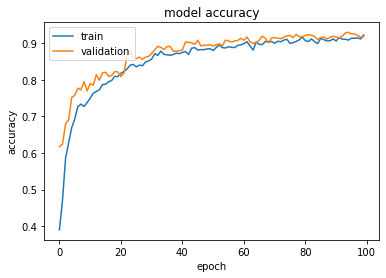

In [57]:
model.summary()
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 10800)             0         
                                                                 
 dense_3 (Dense)             (None, 150)               1620150   
                                                                 
 dropout_2 (Dropout)         (None, 150)               0         
                                                                 
 dense_4 (Dense)             (None, 150)               22650     
                                                                 
 dropout_3 (Dropout)         (None, 150)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 453       
                                                                 
Total params: 1,643,253
Trainable params: 1,643,253
No

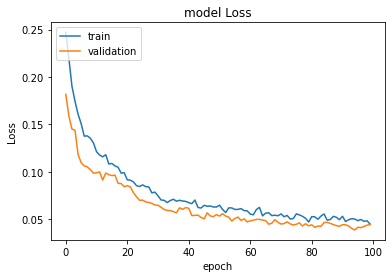

In [58]:
model.summary()
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss') 
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [59]:
# from sklearn.metrics import classification_report, confusion_matrix
# import numpy as np

# num_samples = len(test_generator)
# Y_pred = model.predict(test_generator, num_samples )
# y_pred = np.argmax(Y_pred, axis=1)
# print('Confusion Matrix')
# print(confusion_matrix(test_generator.classes, y_pred))
# print('Classification Report')
# target_names = ['Rock', 'Paper', 'sisscors']
# print(classification_report(test_generator.classes, y_pred, target_names=target_names))

In [60]:
from tqdm import tqdm
train_generator.reset()
X_test, y_test = next(train_generator)
for i in tqdm(range(int(len(train_generator)/10)-1)): 
        img, label = next(train_generator)
        X_test = np.append(X_test, img, axis=0 )
        y_test = np.append(y_test, label, axis=0)


C:\Users\lenovo\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [00:01<00:00, 20.88it/s]


In [61]:
y_pred = model.predict(X_test)

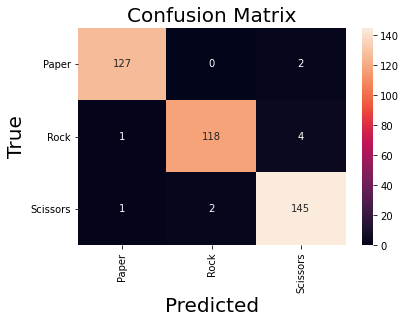

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       129
           1       0.98      0.96      0.97       123
           2       0.96      0.98      0.97       148

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.98       400
weighted avg       0.98      0.97      0.98       400



In [64]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

predictions = model.predict(X_test, steps=len(X_test), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)


cm = confusion_matrix(y_true, y_pred)
class_names = ["Paper","Rock","Scissors"]

# Plot confusion matrix in a beautiful manner
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)


plt.show()
print('Classification Report')
print(classification_report(y_true, y_pred))

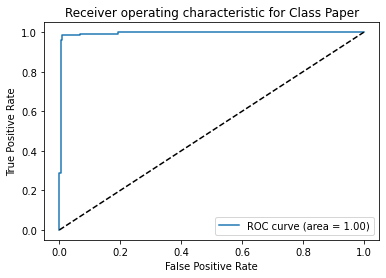

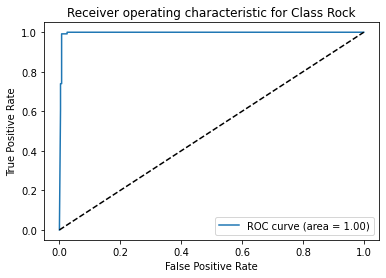

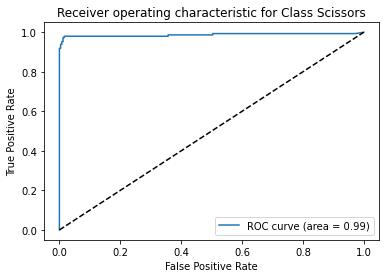

In [63]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_pred = model.predict (X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
class_names = ["Paper","Rock","Scissors"]

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(3):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic for Class {class_names[i]}')
    plt.legend(loc="lower right")
    plt.show()